# Square Root of 2 Problem

## Objective
**To Create a Function that print's the square root of 2 without using in built python modules, to 100 Decimal Places**

============================================================================================================================

## Problems

### The Square Root of 2 is a Irrational Number

If we try to get the Square root of 2 as a fraction we can run into some issues.
Let's take it to it's simplest fractional form **M/N** which when squared can equate to **m^2 = 2 x n^2**.
**M^2** must be a even number, to ensure a even number after we do our calculations, we also must make **n^2** a even number as if we take **m^2/n^2 = 2** , so at first thought we could simplify the fraction with something like 2/12 == 1/6 and no matter how we do it, M and N will be even numbers which means we already have a simplified fraction whether it be 2/12 or 1/6 or 4/24 etc. So something must be wrong here, The issue is that we cannot take the square root of 2 as a Fraction, it is actually a Irrational Number as it cannot be written in a ratio or fraction.

The Term **Reductio ad absurdum** could be used for this case, which is also known as **"Proof by Contradiction"** 
According to https://en.wikipedia.org/wiki/Reductio_ad_absurdum

**Reductio ad absurdum** is a a type of logical argument where one assumes a claim for the sake of argument and derives an absurd or ridiculous outcome, and then concludes that the original claim must have been wrong as it led to an absurd result.

#### Conclusion 

The square root of 2 is "irrational" because if it could be written as a fraction then we would have the absurd case that the fraction would have even numbers at both top and bottom and so could always be simplified leading to endlessness.

You can also find that it in decimal places can go on forever. Here is a Link to a Nasa page of the Square Root of 2 to 1 Million Decimal Places. https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil


### Python3 does not support 100 Decimal Places of Accuracy Natively

Through my coding and research I had found the difficulty with precision within python's default number assignment. I could get the number to 53 decimal places with trailing 0's using a FString and formatting the result of a algorithm to .100f, the issue was that this was highly innaccurate and did not actually print the number to 100 decimal places, after some research through the Python Documentation I found out there was a hard limit on the amount of decimal place numbers we could have.
https://docs.python.org/3/tutorial/floatingpoint.html 

*"Python floats to IEEE-754 “double precision”. 754 doubles contain 53 bits of precision, so on input the computer strives to convert 0.1 to the closest fraction it can of the form J/2**N where J is an integer containing exactly 53 bits."*

**This was the key sentence that stuck out to me and was the root of the trailing 0's issue.**

#### Conclusion
So what was the solution to overcome these limits of the IEEE-754 Double Precision standard within python that numbers would default to. I thought over various scenearios and the realization is that I could still use strings as they are not limited by the artithmitic issues that numbers are and could print as many characters as I see fit for this purpose.
I also came to create my own algorithm of pushing the numbers to left hand side of the decimal and making them whole numbers as this would bypass the issue and then I could format the number to place the decimal point where it needed to be.
To do this I would need to multiply the number to the base of 10 and some very long number to give it enough space to take in enough whole numbers to make up the decimal of 100 places after string formatting.
In this case I decided on multiplying the number 2 to the base of 10 to the power of 200 as this seemed most logical and would give me the leeway needed.


## Solution
After doing research on the various ways of Computing The Square Root of a number through a [Wikipedia Article](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots). I came to the conclusion that progammatically the Newton Method also known as the Babylonian Method or Heron's Method would be the simpliest to program and provide a very accurate result without using in built Math Libaries/Modules in Python3 such as **Math**,**Decimal** or **Fractions**.
I originally felt that maybe digit by digit calculation could be used and I could append each number to list or a string but programmatically this looked it could be long winded and cause more confusion. There is also the Bakhshali Method where the  approximation roughly quadruples with each iteration for the Square Root of the Number and offers high accuracy to. 

Overall I felt you could use any Square Root algorithm and find the Square Root of 2 to a near 100% accuracy and that even the Math Libaries in various programming languages probably uses these forms of algorithms to approximate a highly accurate square root of a irrational number or normal fractionable number.

I used integers in Python as they are unbounded and could reach a very high whole number value without overflowing when not using Mathamatics based modules.
I discovered this through various stackoverflow comments and then performing research on these comments and coming to this link.
https://mortada.net/can-integer-operations-overflow-in-python.html


### The Final Code and Programmatic Solution

In [1]:
#Newton's Method (Babylonian or Hernons)
# Returns the square root of n (This is our sqrt2 Function but can take any input by changing N).
def squareRoot(n): 
    # We are using n itself as 
    # initial approximation (It is accurate but not fully but would be a real starting case)
    # Setting everything to a Integer as Integers in Python are Unbounded.
        approximation = int(n) 
        initialization = int(1.00000)
          
        # accuracy decides the accuracy/precision level 
        accuracy = 0.100
        # While the Approximation - the Intialization is greater then the accuracy Floor divide the approximation by 2
        # and set the Intitialization to the original approximization floor divided by the new approximation.
        # We are using floor divides also known as Integer divides to keep the number within the Integer Format.
        while(approximation - initialization > accuracy): 
              
            approximation = (approximation + initialization) // 2
            initialization = n // approximation 
      
        # When the Sum of the Approximation minus the Initialization is less than 
        # the Accuracy Return the Number as a Integer
        return int(approximation) 

# Set N to a high integer value where the values are pushed to the left
n = 2 * 10 ** 200

# Print the Square root of 2. fString explanation = squareRoot of 2 function floor divide(integer divide) by 10*100 
# and then add a decimal point "." and get the numbers after decimal in this case our function's 
# remainder after being divided by 10 to the power of 100 to 100 decimal places 
print(f'Square Root of 2 to 100 Decimal Places : {squareRoot(n) // 10**100}.{squareRoot(n) % 10**100 :100d}')


Square Root of 2 to 100 Decimal Places : 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


### Code Explanation
I created a square root function that would use the Newton's Method of finding a highly accurate approximation.
For this I took an initial approximation and set it to the inputed number(*In this case "2"*). I set the intialization on what number could be closest to it, as 1 as this would logically be the number we would think of when we think of the square root of 2 mathmatically as a guess. I set the accuracy to 0.100 decimal places to ensure that the algorithm would run till it reached 100 decimal places. I then setup a while loop to run to while the approximation minus the initialization is greater then the accuracy we want and then redefined the variables to try get more accurate with our final approximation so in this case I set the approximation equal to the apprxomation plus the intialization floor divided by 2 and the intialization now equal to the number integer divided by the new approximation. I did it this was as it was how the Newton's algorithm would of done it mathmatically except I am merely coding up a python3 version of it. After the accuracy is greater then our sum of minusing the numbers from eachother I return the Integer value of the approximation. 

This number would be quite large as I multipled 2 to the base of 10 and powered it to 200 to ensure that I had enough digit leeway while not changing the value to get the integer number to 100 decimal places.

Finally I created a F-String print statement which takes in the function we created twice. The First time we are integer dividing it to the base of 10 to 100 to retrive the Intitial Integer value before the decimal point which would be "1". The reason I did it this way rather then typing "1" is because I wanted it to have mathmatical merit and make the function re-useable in the future incase someone changes N to another irrational number such as PI. Finally I add a fake decimal point after the initial "1" we previously printed and then print out the remainder of our square root function with the same Number value (in this case 2) modulus divided by the base of 10 to the power of 100 and formatted the number/string to 100 decimals.

### End of Task 1

***



# Chi-squared  Test

## What is a Chi-Squared Test?

A Chi Squared Test is short for **"Pearson's Chi-Squared Test"** and is often used in statistics to determine if there is a significant difference between the expected frequencies and the observed frequiences in one or more categories. 

## The Collar Jobs Example
Taken from **[Wikipedia's](https://en.wikipedia.org/wiki/Chi-squared_test) example chi-squared test for categorical data** 

*Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as “white collar”, “blue collar”, or “no collar”. The null hypothesis is that each person’s neighborhood of residence is independent of the person’s occupational classification. The data are tabulated as follows* **Run the below code to get the table**

In [2]:
import numpy
import pandas
import scipy.stats as stats

cols = ['A', 'B', 'C', 'D']

# Use Panda's Dataframe Method to print the data in a table like format
data = pandas.DataFrame(columns=cols)

# Setup the Colums in the Data
data.loc['White Collar'] = [90, 60, 104, 95]
data.loc['Blue Collar'] = [30, 50, 51, 20]
data.loc['No collar'] = [30, 40, 45, 35]

print(data)

               A   B    C   D
White Collar  90  60  104  95
Blue Collar   30  50   51  20
No collar     30  40   45  35


We can take the example given above and apply a chi squared test to test whether area effects the numbers of each collar type. We can report an expected distributation if column does not effect the values in each row.
In this example wikipedia states the Chi-squared value based on this table/test is approximately **24.6**. We can use a python package known as **scipy.stats** which is imported in the above code to verify if this value is correct and then use the same package to calculate the associated ***p* value**. 

**Run the code below which is a continuation of the code in[1] to see the Chi Squared value and associated p value calculated by scipy.stats**

In [3]:
chi2, pValue, degreesOfFreedom, expected = stats.chi2_contingency(data)
print('\nChi Squared Value')
print (round(chi2,1))

print ('\nP value for effect of area on proportion of each collar:')
print(pValue)


Chi Squared Value
24.6

P value for effect of area on proportion of each collar:
0.0004098425861096696


As we can see by rounding the value to 1 decimal place the same as wikipedia's way of formatting the number, we are retrieving the same Chi Squared test value as the example they gave and thus their value is correct.

In order for wikipedia to get this value they took the observed values and expected values of each cell and ran a few calculations. In this instance they took the hypthoesis that by assumption of independence the example should expect the white collar workers in neighbourhood A to be 150(total workers sample in neighbourhood A) x 349(the total white collar workers sample in all neighbourhoods)divided by (650 the overall sample total) which have them a value of **80.54** which would be our expected value for Sample A. 

By taking this value of 80.54 and bringing it into another calculation we can achieve the chi squared value for this column, in this case

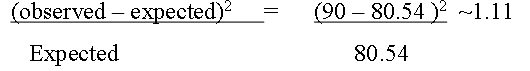

By continuing these form of calculations on each total column and then summing the values together we can get the chi squared value we achieved in the code above **24.6**. 

### The Useful extras of scipy.stats chi2 method
Not only does scipy.stats.chi2_contingency() method provide us the overall chi Squared value and the associated p value but it also can return the Degrees of Freedom and The Expected values so that the user does not need to do these calculations himself for a full draft and explanation of the program's maths for proofing.

**Below is an example**


In [4]:
print("Expected Values: \n")
print(expected)

print("Degrees of Freedom: \n")
print(degreesOfFreedom)

Expected Values: 

[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]
Degrees of Freedom: 

6


Under null hypthosis according to wikipedia,this sum has an approximately chi squared distribution where the degrees of freedom = "6" which is the same as the value we have above during our code test. However if a test is improbably large according to the distribution, then in this example the observer could reject the null hypothesis of independence. Null hypthesis being the assumed value by the non observer.

### Related Issue - Test of Homogeneity
If we take the case where we give every resident of each of the four neighbourhoods an equal chance of being included in this sample, then each resident has the same chance of being chosen as do all residents of the same neighborhood, but residents of different neighborhoods would have different probabilities of being chosen if the four sample sizes were not proportional to the populations of the four neighbourhoods. In this case we would perform a test of "homogenity" rather then "independance". The overall question of this test would be are the proprotions of the collars in the four neighbourhoods the same, however you could perform this test the same way just with the new altered values.

### Applications of Chi-Squared Tests

In the real world these types of tests are often used in **crytanlayis** to compare the distribution of plain text and decrypted ciphertext. The lowest value of the test being the probability of a successful decryption. This method can be generalized for many modern cryptographic problems.

Chi-Squared tests can also be used in **bioinformatics** to compare the distrubtion of certain properties in genes belonging to different categories such as disease genes,essential genes and genes relating to certain chromosones , etc).

### References / Research Materials

Chi Squared Test Wikipedia Article
https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096

Chi Squared Test PDF by Mmcmodinagar
http://mmcmodinagar.ac.in/econtent/zoology/CHI_SQUARE_TESTS.pdf

Pearson's chi square test (goodness of fit) | Probability and Statistics | Khan Academy (Youtube Video)
https://youtu.be/2QeDRsxSF9M

Statistics How To (.coms) Article on Chi Squared Tests
https://www.statisticshowto.com/probability-and-statistics/chi-square/

### End of Task 2


***

# Standard  Deviation (STDDEV.P v.s STDDEV.S)

## The Problem

In programming Standard Deviation we often use $np.sqrt(np.sum((x - np.mean(x))**2)/len(x))$ in python to calculate standard deviation. Although this solution is good for a overall population, it is not efficent for samples of a population. In microsoft excel this often known as **STDDEV.P vs STDDEV.S** in STDDEV.S we would actually use $len(x)-1$ and then **STDDEV.P** follows the same format as the above code. 

The reason for this difference is because it is mathematically incorrect to use **STDDEV.P** for a Sample Size of the population, and it's purpose is more used if you know the absolute value of the populations.
For Example : We would use **STDDEV.P** to "*get the standard deviation of the total population of people who caught the covid-19 virus in the whole of Ireland's population based on age group*" but we would use **STDDEV.S** in the circumstances of "*get the standard deviation among 100,000 people who caught the covid-19 virus based on age group*". 

Another name for this n-1 deviation is **Bessel's Correction**, generally this correction is used to approach the bias due to finite sample sizes although in some cases this may not be enough to remove the bias and it can become necessary to do more complex multi-parameter estimations.


## Sample Deviation Data Sets in Python
In the below sample I will show the difference in deviation values using the two methods of calculating them.
In this sample of the population, I am measuring coronavirus cases among different age groups in a sample size of 3000 people.



In [2]:
import numpy as np
import pandas as pd

# Population Deviation Function
def popDeviation(x):
    return np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
# Sample Population Deviation Function
def samplePopDeviation(x):
    return np.sqrt(np.sum((x - np.mean(x))**2)/len(x)-1)

print("\n\tCases over 3,000 People in Different Age Groups\n=========================================================")
cols = ['0-18', '19-40', '41-60', '61+']
values = [100, 245, 120, 155]
# Use Panda's Dataframe Method to print the data in a table like format
data = pd.DataFrame(columns=cols)

# Setup the Column in the Data
data.loc['Posistive Cases'] = values
print(data)

print("\nPopulation Total Deviation:")
print(round(popDeviation(values),2))

print("\nSample Deviation (Bessel's Correction)")
print(round(samplePopDeviation(values),2))


	Cases over 3,000 People in Different Age Groups
                0-18 19-40 41-60  61+
Posistive Cases  100   245   120  155

Population Total Deviation:
55.57

Sample Deviation (Bessel's Correction)
55.56


As you can see above, the values are closely linked but a **1/100** off each other. The issue with this , is that it's not logically accurate and it is still a point off. If we were to deal with a bigger sample set, they would probably be even further apart in value. When it comes to statistics we cannot risk being innaccurate in our values or deviations as this could make a big difference in the decesions government bodies or companies decide to make. It is not logical to use a deviation method that is meant for a whole population on a sample sized set as they do not make up the over all picture and there could be a bit of coincidence involved. For example in our dataset above , we could have gotten very lucky in who we picked and the values could be completely different in another 3000 people. So in this sceneario it actually could of been better to take the whole population and use the standard deviation calculation algorithm so we get a real result that is tangible and can be acted upon. By adding a $n-1$ factor to our sample size we can get much closer to the real value if we were take the whole population of the country, It would be nearly guranteed that the whole population deviation of let's say 4 million people in this country would be closer to the value of **55.6** then **55.7** which the **Standard Deviation without Bessel's Correction** stated.

### References / Research Materials

Standard Deviation Wikipedia
https://en.wikipedia.org/wiki/Standard_deviation
 
Bessel's Correction Wikipedia
https://en.wikipedia.org/wiki/Bessel%27s_correction

Standard Deviation MathsIsFun
https://www.mathsisfun.com/data/standard-deviation.html

Calculate a Sample Standard Deviation
https://www.thoughtco.com/calculate-a-sample-standard-deviation-3126345

How To Calculate Standard Deviation - The Organic Chemistry Tutor
https://www.youtube.com/watch?v=IaTFpp-uzp0

### End of Task 3

***

# Sckit-Learn Module and the Famous Iris Data Set

## What is Sckit-Learn

Sckit-Learn is a simple and efficent machine learning tool for predictive data analysis built for python. It is built upon **Numpy,SciPy and matplotlib** modules and is open source with acceptance for commercially useable scenearios.

## What is the Famous Iris Data Set?

This is a famously known database to be found in the pattern recongnition litreature subjects. Fisher's paper is a classic in the field and is referenced frequently till this day. The iris data set contains 4 classes of 50 instances each, where each class refers to the type of iris plant. One species is linearly seperable from the other 2 species. The latter being not lineraly seperable from each other.

### Code Below for this Notebook Section

In [3]:
# Import Statistical and Mathamatical Modules
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn import datasets 

# Load the Iris Species Dataset
iris = datasets.load_iris()

# Data Frame to test the dataset is present and for graphical purposes
frame1 = pd.DataFrame(iris.data,columns=iris.feature_names)

frame1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0, 0.5, 'Sepal Width')

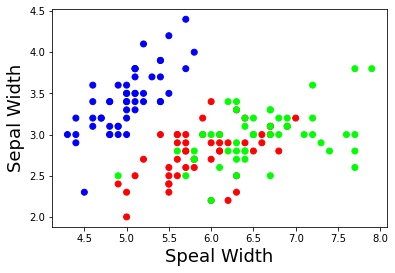

In [5]:
# Setup a Target and Predictors
X = iris.data[:,:2]
y = iris.target

# Setup Data on Scatter Plot vs Original Data
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.xlabel('Speal Width',fontsize = 18)
plt.ylabel('Sepal Width',fontsize = 18)


In [20]:
# Finally we can apply the K-Means Clustering to the Iris Data Set
# Originally the KMeans Parameter contains n_jobs
#but that is now deprecated.

# Random State is used as good practice to make the results of 
# the prediction reproducible and be useful for debbugging.
# The reasoning being that with kmeans is not optimal and the
# values can change alot in re-run without a starting random_state.
kmeans = KMeans(n_clusters=4,random_state=1)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=1)

In [21]:
# Identify the Center Points of the Iris Data Set Kmeans
centers = kmeans.cluster_centers_
# Print the Predicted Centers
print(centers)

[[6.85348837 3.1       ]
 [5.22068966 3.66551724]
 [5.90980392 2.73529412]
 [4.77777778 2.94444444]]


Text(0.5, 1.0, 'Predicted Data (Clustered Result)')

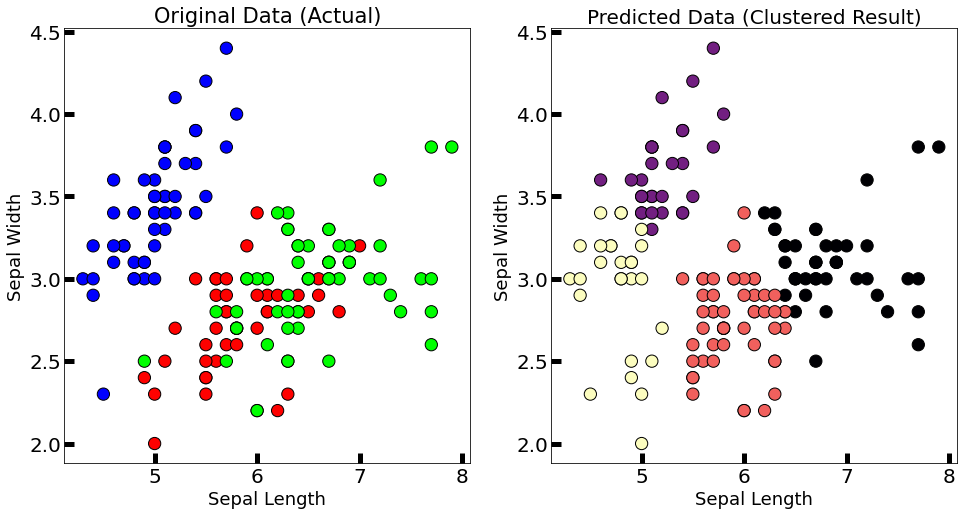

In [27]:
# Now that we have our data setup with kmeans.
# We need to compare two plot clusters to see how accurate kmeans is.

fig,axes = plt.subplots(1,2,figsize=(16,8))

axes[0].scatter(X[:,0],X[:,1],c=y,cmap='brg',edgecolor='k',s=150)
axes[1].scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='magma',edgecolor='k',s=150)

axes[0].set_xlabel('Sepal Length',fontsize=18)
axes[0].set_ylabel('Sepal Width',fontsize=18)

axes[1].set_xlabel('Sepal Length',fontsize=18)
axes[1].set_ylabel('Sepal Width',fontsize=18)

axes[0].tick_params(direction='in',length=10,width=5,colors='k',labelsize=20)
axes[1].tick_params(direction='in',length=10,width=5,colors='k',labelsize=20)

axes[0].set_title("Original Data (Actual)",fontsize=21)
axes[1].set_title("Predicted Data (Clustered Result)",fontsize =20)



## The Results

As we can see from the two plots above. The Predicted Data also known as the clustered result is incredibly close to the Actual Data Plot in terms of where the plotted points are.

## The issue with K-Means as a Algorithm
The main issue with the k-means alogrithm is that it is not optimal. That means, it is not sure to find the best solution, as the problem is not convex (for the optimisation).

You may be stuck into local minima, and hence the result of your algorithm depends on your initialization (of your centroids). A good practice in order to find a good minimum is to rerun the algortihm several times with several initializations and keep the best result.

As stated above, random_state makes the results reproducible and can be useful for debugging but this is still no means to have a result stay perfectly the same every time or even be 100% accurate. K-Means also does not work well with data of varying shapes and densities for it is highly-scaled dependant therefore for these plots to produce more accurate results human evaluation would be needed.

## Predict Different Species of Iris
In order to predict different Species of Iris using my KMeans Cluster Model, you would need to change the number of clusters, and random state in the code where I intialized the cluster as these effect the posistion of the plots or how the data will be shown/processed.

Eg. We need 5 clusters and want to set the State to 25
```python 
kmeans = KMeans(n_clusters=5,random_state=25)<---
kmeans.fit(X)
```



## References / Research

Wiki Article Iris Flower Data Set : https://en.wikipedia.org/wiki/Iris_flower_data_set

Archive.ics.uci.edu : https://archive.ics.uci.edu/ml/datasets/iris

Iris Dataset by Scikit Learn.org : https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Sckit Learn Dataset Loading Utilities: https://scikit-learn.org/stable/datasets/index.html

Sckit Learn Module : https://scikit-learn.org/stable/

Numpy : https://numpy.org/

Pandas: https://pandas.pydata.org/

Predicting Iris Flower Species With K-Means Clustering In Python
by Belen Sanchez(Medium Blogger)
https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee

K-Means Clustering using sklearn and Python by Dhiraj K
https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

### End Of Task 4